In [341]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')



# para que salga el grafico
 #matplotlib inline

---------

# LIMPIEZA - GENERAL

------

In [342]:
df_ori = pd.read_csv('../proyecto1-sharks-/attacks.csv',  encoding='cp1252')

df = df_ori.copy()

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Renombro columnas

In [343]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [344]:
#renombro columnas antes de hacer mas cambios, sobre todo cuando llegue a fecha y otras.

df.rename(columns={'Case Number': 'case-number1', 'Date': 'date', 'Type': 'typeattack', 'Country': 'country', 'Area': 'area', 'Location': 'location',
       'Activity': 'activity', 'Name': 'name', 'Sex ':'sex', 'Age': 'age', 'Injury': 'injury', 'Fatal (Y/N)': 'fatality', 'Time': 'time',
       'Species ': 'species', 'Investigator or Source': 'source', 'pdf': 'pdf', 'href formula': 'url1', 'href':'url2',
       'Case Number.1': 'casenumber1', 'Case Number.2':'casenumber2', 'original order': 'originalorder', 'Unnamed: 22':'empty1', 'Unnamed: 23': 'empty2'}, inplace=True)



### Empieza investigación

In [345]:
df.head()

,case-number1,date,Year,typeattack,country,area,location,activity,name,sex,age,injury,fatality,time,species,source,pdf,url1,url2,casenumber1,casenumber2,originalorder,empty1,empty2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [346]:
df.shape

(25723, 24)

In [347]:
df.info('deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   case-number1   8702 non-null   object 
 1   date           6302 non-null   object 
 2   Year           6300 non-null   float64
 3   typeattack     6298 non-null   object 
 4   country        6252 non-null   object 
 5   area           5847 non-null   object 
 6   location       5762 non-null   object 
 7   activity       5758 non-null   object 
 8   name           6092 non-null   object 
 9   sex            5737 non-null   object 
 10  age            3471 non-null   object 
 11  injury         6274 non-null   object 
 12  fatality       5763 non-null   object 
 13  time           2948 non-null   object 
 14  species        3464 non-null   object 
 15  source         6285 non-null   object 
 16  pdf            6302 non-null   object 
 17  url1           6301 non-null   object 
 18  url2  

In [348]:
num_df = df.select_dtypes(exclude='object')

num_df.columns

Index(['Year', 'originalorder'], dtype='object')

## Eliminamos duplicados

In [349]:
#eliminamos duplicados

df= df.drop_duplicates()

In [350]:
df.shape


(6312, 24)

# REVISAMOS COLUMNAS CON VALORES 0 - VACIOS PARA LUEGO CVER QUE PODEMOS HACER.

In [351]:
nan_cols = df.isna().sum()
nan_cols[nan_cols>0]


case-number1        2
date               10
Year               12
typeattack         14
country            60
area              465
location          550
activity          554
name              220
sex               575
age              2841
injury             38
fatality          549
time             3364
species          2848
source             27
pdf                10
url1               11
url2               10
casenumber1        10
casenumber2        10
originalorder       3
empty1           6311
empty2           6310
dtype: int64

-----  

# LIMPIEZA DATE

-----------

In [352]:
#VAMOS A ELIMINAR EN LA COLUMNA DATA LA PALABRA REPORTED PARA HOMOGENIZAR LA COLUMNA

df.date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

### Probamos el Replace

In [353]:
#AQUI HAGO EL REPLACE DE REPORTED -

df['date'] = df['date'].str.replace('Reported','')

In [354]:
df.date[df.date == 'Reported']

Series([], Name: date, dtype: object)

In [355]:
df.date.value_counts()

1957                                                                11
1942                                                                 9
1956                                                                 8
1958                                                                 7
1941                                                                 7
1950                                                                 7
No date                                                              6
1949                                                                 6
1954                                                                 5
1955                                                                 5
No date, Before 1963                                                 5
1959                                                                 5
05-Oct-2003                                                          5
1970s                                                                5
Oct-19

In [356]:
df.date.fillna('unknown', inplace=True)

In [357]:
# quitamos espacios
df['date'] = df['date'].str.lstrip()

df['date'] = df['date'].str.rstrip()

In [358]:
#VAMOS A VER SI ENCONTRAMOS LA REPORTED DENTRO DE LA COLUMNA DATE. PARA ENTENDER SI LA HEMOS REEMPLAZADO. Parece que si.

key_word = 'Reported'

find = df.date[df.date.str.contains(key_word)]

find

Series([], Name: date, dtype: object)

In [359]:
#REVISO SI SIGUE EXISTIENDO Y PARECE QUE YA HA HECHO EL REPLACE. Iguamente esta columna tiene muchas filas que podrian ser homogenizadas, sin embargo
#de primeras pienso que no es necesario complicarse con un dato en parte irrelevante, ya que el dia es demasiado puntual y no hay posible forma de
#correcionarlo con otros datos. pero si interesa el mes a ser posible por lo que aplicaré un bonito regex.

filtered = df[(df['date']=='Reported')]
filtered.head()

,case-number1,date,Year,typeattack,country,area,location,activity,name,sex,age,injury,fatality,time,species,source,pdf,url1,url2,casenumber1,casenumber2,originalorder,empty1,empty2


## REGEX: date - intento

In [360]:
# encuentra 5241 valores que cumplen el regex de unos 5748 totales

'''key_word = '\w{3}[-]\d{4}'

find = df[df.date.str.contains(key_word, regex=True)]

len(find) '''

"key_word = '\\w{3}[-]\\d{4}'\n\nfind = df[df.date.str.contains(key_word, regex=True)]\n\nlen(find) "

In [361]:
# siguiente paso droppear las filas que no cumplen el regex, no me atrevo al haberlo al final, por no jorobar todo

'''key_word = '\w{3}[-]\d{4}'

# 
df1 = df[~(df['date'] == key_word)].index 
df.drop(df1, inplace = True)
print(df)

dollars.str.replace(r"-\$", "-", regex=True)'''

'key_word = \'\\w{3}[-]\\d{4}\'\n\n# \ndf1 = df[~(df[\'date\'] == key_word)].index \ndf.drop(df1, inplace = True)\nprint(df)\n\ndollars.str.replace(r"-\\$", "-", regex=True)'

In [362]:
df.date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', 'unknown'], dtype=object)

In [363]:

from datetime import date

#intento quitarme la roña sobrante con unknown pero no lo reconoce y me lo pasa todo como unknonw


pass
meses=[]
for i in df.date:
    if i.find("Jan") >=0:
        meses.append("jan")
    elif i.find("Feb") >=0:
        meses.append("feb")
    elif i.find("May") >=0:
        meses.append("may")
    elif i.find("Abr") >=0:
        meses.append("abr")
    elif i.find("Jun") >=0:
        meses.append("jun")
    elif i.find("Jul") >=0:
        meses.append("jul")
    elif i.find("Aug") >=0:
        meses.append("aug")
    elif i.find("Sep") >=0:
        meses.append("sep")
    elif i.find("Oct") >=0:
        meses.append("oct")
    elif i.find("Nov") >=0:
        meses.append("nov")
    elif i.find("Dec") >=0:
        meses.append("dec")
    elif i.find("Apr") >=0:
        meses.append("abr")
    elif i.find("Mar") >=0:
        meses.append("march")
    elif i.find("Sum") >=0:
        meses.append("jul")
    elif i.find("Fall") >=0:
        meses.append("oct")
    else:
        meses.append(i)
df.date=meses









In [364]:
# con esto elimino todas las filas que no cumplen y son raras de años etc.

no_date = df[(df['date']!="jan") & (df['date']!="feb")& (df['date']!="may") & (df['date']!="abr")& (df['date']!="jun")& (df['date']!="jul")& (df['date']!="aug")& (df['date']!="sep")& (df['date']!="oct")& (df['date']!="nov")& (df['date']!="dec")& (df['date']!="abr")& (df['date']!="march")].index
no_date
df.drop(no_date, axis=0, inplace=True)
df.shape

(5804, 24)

-----

# YEAR

--------

In [365]:
df.Year.unique()

array([2018., 2017.,   nan, 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976.,
       1975., 1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1848., 1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940.,
       1939., 1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931.,
       1930., 1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922.,
       1921., 1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913.,
       1912., 1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904.,
       1903., 1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895.,
       1894., 1893.,

In [366]:
# df.Year.fillna('unknown', inplace=True)

In [367]:
# voy a eliminar todos aquellos que son 0,  no son validos

df.shape

(5804, 24)

In [368]:
# aqui estoy probando de eliminar aquellas filas que contienen cero, y en la siguiente 5.
#aunque  mas adelante elimino todo aquello por debajo de 1961.
df= df[df['Year'] != 0]

In [369]:
df= df[df['Year'] != 5]

In [370]:
df.Year.shape

(5788,)

In [371]:
# al ser un float parece que no consigue droppear los años por lo que vamos a intentar cambiarlo. una vez que limpiemos la columna la devolvemos.

# vale ahora se supone que deberia funcionar. Pues parece que no.


df["Year"] = df["Year"].apply(np.float64)
print(df.dtypes)

case-number1      object
date              object
Year             float64
typeattack        object
country           object
area              object
location          object
activity          object
name              object
sex               object
age               object
injury            object
fatality          object
time              object
species           object
source            object
pdf               object
url1              object
url2              object
casenumber1       object
casenumber2       object
originalorder    float64
empty1            object
empty2            object
dtype: object


In [372]:
#vamos a dropear todos aquellos años menores a 1959, Year es un float 

# esta no ha funcionado : df2 = df.drop(df.index[(df['Year']<=1961)])

# pruebo nueva, y se los ha fumado todos perfectamente. asi que ni regex ni leches.

df.drop(df[df['Year'] <=1960].index, inplace = True)

In [373]:
# Year limpito.

--------

#  TYPE ATTACK

--------------

In [374]:
df.typeattack.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)

In [375]:
#aqui encontraremos los valores en la columna type -invalid- para eliminar todas las filas que lo contengan. Parece no funcionar hasta que ocupe los nulos
#con unknown o otro dato, existen 574 valores "invalid" y 2 "Questionable" y unos 14 vacios que vamos a llamar "unknonw " y dropearlos.

df.typeattack.fillna('unknown', inplace=True)
#

In [376]:
#miro que exactamente invalid se haya eliminado
key_word = 'invalid'

find = df[df.typeattack.str.contains(key_word, regex=True)]

find.head()

,case-number1,date,Year,typeattack,country,area,location,activity,name,sex,age,injury,fatality,time,species,source,pdf,url1,url2,casenumber1,casenumber2,originalorder,empty1,empty2


In [377]:
#vamos a probar una forma de borrar invalid, y si funciona le añado el resto

df = df[df["typeattack"].str.contains("Invalid") == False]


In [378]:
df.shape

(3536, 24)

In [379]:
#funciono!!! aunque si comparo el antes y despues veo que solo borro 367 filas y no las 547 iniciales, sin embargo ya no sale como value counts. prosigo borrado de otras filas.

key_word = 'unknown'

find = df[df.typeattack.str.contains(key_word, regex=True)]

len(find)

2

In [380]:
df = df[df["typeattack"].str.contains("Questionable") == False]



In [381]:
df = df[df["typeattack"].str.contains("unknown") == False]


In [382]:
#ya tenemos los datos bastante mas congruentes ahora deberiamos ver como pasar ese Boatomg o eliminar, que es mas facil y es solo un dato

df.typeattack.value_counts()

Unprovoked      2930
Provoked         340
Boat              98
Boating           91
Sea Disaster      72
Boatomg            1
Name: typeattack, dtype: int64

In [383]:
df = df[df["typeattack"].str.contains("Boatomg") == False]


In [384]:
#ahora debemos reemplazar boating o boat para juntar los datos
df.typeattack.value_counts()

Unprovoked      2930
Provoked         340
Boat              98
Boating           91
Sea Disaster      72
Name: typeattack, dtype: int64

In [385]:
# de esta forma ya unificamos los datos y tenemos una columna perfecta

df['typeattack'] = df['typeattack'].str.replace('Boating','Boat')

In [386]:
#boat y sea disaster are very similar se podria juntar ambas o diferenciar, por alta mar y cerca de la costa.
df.typeattack.value_counts()

Unprovoked      2930
Provoked         340
Boat             189
Sea Disaster      72
Name: typeattack, dtype: int64

--------

# Empieza Country

------------

In [387]:
df.country.unique()
#hay un cholon de cosas, y bueno podria ser bueno quitar las upper case,  y ver si hay espacios mal puestos

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'SOUTH AFRICA', 'THAILAND',
       'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'ECUADOR',
       'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS', 'NEW ZEALAND',
       'SPAIN', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'UNITED KINGDOM', 'UNITED ARAB EMIRATES', 'PHILIPPINES',
       'INDONESIA', 'FRENCH POLYNESIA', 'CHINA', 'COLUMBIA', 'Fiji',
       'DOMINICAN REPUBLIC', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'PALESTINIAN TERRITORIES', 'GUAM',
       'SEYCHELLES', 'BELIZE', 'JAMAICA', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'ITALY', 'CHILE', 'KENYA', 'RUSSIA', 'TURKS & CAICOS', 'SAMOA',
       'AZORES', 'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MADAGASCAR',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'SOMALIA'

In [475]:
df.country.value_counts()

USA             1415
Australia        581
South Africa     361
Name: country, dtype: int64

### Rellenamos espacios en blanco con unknown y podemos filtrar etc.

In [389]:
df.country.fillna('unknown', inplace=True)


In [390]:
key_word = 'ITALY'

find = df[df.country.str.contains(key_word)]
find.head()

,case-number1,date,Year,typeattack,country,area,location,activity,name,sex,age,injury,fatality,time,species,source,pdf,url1,url2,casenumber1,casenumber2,originalorder,empty1,empty2
786,2012.06.10,jun,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0,NaN,NaN
1443,2006.08.20.b,aug,2006.0,Sea Disaster,ITALY,NaN,Lampedusa Island,Sea Disaster,a refugee,M,NaN,FATAL,Y,NaN,NaN,IM/LR,2006.08.20.b-Lampedusa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.08.20.b,2006.08.20.b,4860.0,NaN,NaN
1928,2001.08.03,aug,2001.0,Boat,ITALY,NaN,Rimini,Fishing,boat; occupants: T & G Longhi,NaN,NaN,No Injury to occupants,N,NaN,NaN,MEDSAF,2001.08.03-Longhi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.08.03,2001.08.03,4375.0,NaN,NaN
2098,1999.09.24,sep,1999.0,Boat,ITALY,Adriatic Sea,San Benedetto,Fishing,Boat “Coca Cola”,NaN,NaN,No Injury to occupants,N,NaN,Said to involve a 7 m [23'] white shark,"Orlando Sentinel, 9/28/1999, p.A12",1999.09.24-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.09.24,1999.09.24,4205.0,NaN,NaN
2587,1991.07.30,jul,1991.0,Boat,ITALY,Ligurian Sea,"Portofino, 20 miles offshore, Tigullio Bay, Sa...",Canoeing,Ivana Iacaccia,F,40,No Injury to occupant; canoe bitten,N,15h30,4 m [13'] white shark,"Stars & Stripes, 8/5/1991, p.8; A. De Maddalen...",1991.07.30-Ivana-Iacaccia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.07.30,1991.07.30,3716.0,NaN,NaN


### Hacemos un lower case 

In [476]:
df['country'].str.lower()


0                usa
3          australia
5          australia
7                usa
8                usa
9                usa
10         australia
11               usa
12               usa
15      south africa
19         australia
21         australia
22         australia
24      south africa
25               usa
28         australia
29         australia
34      south africa
35               usa
36         australia
37         australia
38         australia
39      south africa
40         australia
41         australia
42         australia
47         australia
49         australia
50         australia
52         australia
53               usa
54               usa
60               usa
61               usa
63         australia
65         australia
66         australia
67               usa
69               usa
70               usa
71         australia
73               usa
74               usa
75               usa
77               usa
78         australia
80               usa
81           

In [392]:

df['country'] = df['country'].str.capitalize()


In [393]:
key_word = 'Unknown'

find = df[df.country.str.contains(key_word)]
find.head()

,case-number1,date,Year,typeattack,country,area,location,activity,name,sex,age,injury,fatality,time,species,source,pdf,url1,url2,casenumber1,casenumber2,originalorder,empty1,empty2
62,2017.11.13.R,nov,2017.0,Unprovoked,Unknown,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241.0,NaN,NaN
3378,1970.11.00,nov,1970.0,Unprovoked,Unknown,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925.0,NaN,NaN
3388,1970.07.05,jul,1970.0,Unprovoked,Unknown,NaN,NaN,NaN,male,M,NaN,Finger or toe severed,N,Night,Mako shark,"H.D. Baldridge (1994), SAF Case #1628",1970.07.05-NV-male.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.07.05,1970.07.05,2915.0,NaN,NaN
3395,1970.04.00.b,abr,1970.0,Provoked,Unknown,NaN,NaN,Freediving,Lionel Jarvis,M,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,N,NaN,Wobbegong shark,"H.D. Baldridge (1994), SAF Case #1616",1970.04.00.b-NV-Jarvis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.04.00.b,1970.04.00.b,2908.0,NaN,NaN
3399,1970.02.05,feb,1970.0,Unprovoked,Unknown,NaN,NaN,Wading,Sally Anne Irvine,F,8,Lacerations to lower leg,N,NaN,Carpet shark,H.D. Baldridge (1994) SAF Case #1626,1970.02.05-NV-Irvine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.02.05,1970.02.05,2904.0,NaN,NaN


### Mejoramos algunos de los paises 

In [394]:
df['country'] = df['country'].str.replace('Usa','USA')

In [395]:
df['country'] = df['country'].str.replace('United arab emirates','United Arab Emirates')

In [396]:
df['country'] = df['country'].str.replace('South africa','South Africa')

In [397]:
df['country'] = df['country'].str.replace('New zealand','New Zealand')

### Quitamos espacios delante y detrás -

In [398]:
df['country'] = df['country'].str.lstrip()


In [399]:
df['country'] = df['country'].str.rstrip()


### Vamos a quitar valores vacios 

In [400]:
##son unas 45 filas vacias que nos quitamos de golpe

df = df[df["country"].str.contains("Unknown") == False]


In [401]:
df.shape

(3524, 24)

In [402]:
df = df[df["country"].str.contains("Unknown") == False]

In [403]:
df.shape

(3524, 24)

df['date'] = df['date'].str.replace('Reported','')

In [404]:
### borrar nulos con la mediana ( para columna edada) df.price.fillna(df.price.mean(), inplace=True)

In [405]:
# para hacer sort y luego borrar: df.sort_values(('invoicedate'), ascending=True).groupby('country').sum().head()

# student.pivot_table(index=['school'], columns=['sex'])

### Ahora podemos ver de eliminar paises inutiles

In [406]:

# eliminamos un monton de paises que no cumplan la condicion, ya que hay un momento que la base de datos baja de golpe el numero de valores, y por tanto su remprensatividad

no_country = df[(df['country']!="USA") & (df['country']!="Australia")& (df['country']!="Papua new guinea") & (df['country']!="South Africa")& (df['country']!="New Zealand")].index
no_country
df.drop(no_country, axis=0, inplace=True)
df.shape




(2677, 24)

In [477]:
df.country.value_counts()

USA             1415
Australia        581
South Africa     361
Name: country, dtype: int64

In [408]:
df.head()

,case-number1,date,Year,typeattack,country,area,location,activity,name,sex,age,injury,fatality,time,species,source,pdf,url1,url2,casenumber1,casenumber2,originalorder,empty1,empty2
0,2018.06.25,jun,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,jun,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
3,2018.06.08,jun,2018.0,Unprovoked,Australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
5,2018.06.03.b,jun,2018.0,Unprovoked,Australia,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris …,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
7,2018.05.27,may,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN


country acabado --------- 


-----------

# AREA

-------------

In [409]:
#repetimos, llenamos vacios con unknown 
df.area.fillna('unknown', inplace=True)



In [478]:
pd.set_option("display.max_rows", None)

df.area.value_counts()


Florida                  851
New South Wales          211
California               201
Hawaii                   195
Western Cape Province    144
Queensland               137
Western Australia        125
Eastern Cape Province    119
South Carolina            99
KwaZulu-Natal             98
North Carolina            69
South Australia           63
Victoria                  45
Name: area, dtype: int64

In [411]:
df['area'] = df['area'].str.lstrip()
df['area'] = df['area'].str.rstrip()

In [412]:
#vamos que podemos eliminar los unknown y que quizas podamos eliminar las areas con bajo value count


In [413]:
'''temp = df.value_counts()<70
df[df['area'].isin(temp[temp].index.get_level_values().values)]'''


"temp = df.value_counts()<70\ndf[df['area'].isin(temp[temp].index.get_level_values().values)]"

In [414]:
df.shape

(2677, 24)

### Elimino las areas que no tienen datos representativos.

In [415]:

no_area = df[(df['area']!="Florida") & (df['area']!="New South Wales")& (df['area']!="Queensland") & (df['area']!="Hawaii")& (df['area']!="California")& (df['area']!="Western Cape Province")& (df['area']!="KwaZulu-Natal")& (df['area']!="Western Australia")& (df['area']!="Eastern Cape Province")& (df['area']!="South Carolina")& (df['area']!="South Australia")& (df['area']!="North Carolina")& (df['area']!="Victoria")].index
no_area
df.drop(no_area, axis=0, inplace=True)
df.shape


(2357, 24)

In [416]:
#queria hacer un bucle, que tuviera en cuenta los value count, y si eran menor que 70 me los quitara, pero no lo he conseguido. 

'''for i in df['area']:
    if i in df.area.value_counts() <= 70:
        df.drop( i, axis=0, inplace=True)
    else:
        None
    
df.shape '''

"for i in df['area']:\n    if i in df.area.value_counts() <= 70:\n        df.drop( i, axis=0, inplace=True)\n    else:\n        None\n    \ndf.shape "

---------------

# Location

----

Para Location relleno las celdas vacias y a correr, no me interesan

In [479]:
df.location.value_counts()

New Smyrna Beach, Volusia County                                                     160
Daytona Beach, Volusia County                                                         28
Ponce Inlet, Volusia County                                                           20
Melbourne Beach, Brevard County                                                       17
unknown                                                                               15
Myrtle Beach, Horry County                                                            15
Isle of Palms, Charleston County                                                      13
Ponce Inlet, New Smyrna Beach, Volusia County                                         12
Cocoa Beach, Brevard County                                                           11
Ormond Beach, Volusia County                                                          10
Singer Island, Riviera Beach, Palm Beach County                                       10
Cocoa Beach, Brevard 

In [418]:
df.location.fillna('unknown', inplace=True)

-------------

# Activity

-----

In [419]:
df.head()

,case-number1,date,Year,typeattack,country,area,location,activity,name,sex,age,injury,fatality,time,species,source,pdf,url1,url2,casenumber1,casenumber2,originalorder,empty1,empty2
0,2018.06.25,jun,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
3,2018.06.08,jun,2018.0,Unprovoked,Australia,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
5,2018.06.03.b,jun,2018.0,Unprovoked,Australia,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris …,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
7,2018.05.27,may,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,may,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN


In [420]:
#quito espacios laterales

df['activity'] = df['activity'].str.lstrip()
df['activity'] = df['activity'].str.rstrip()

In [480]:
df.activity.value_counts()

Surfing                                                                                                                                         823
Swimming                                                                                                                                        428
Fishing                                                                                                                                         310
unknown                                                                                                                                         114
Diving                                                                                                                                           92
Body Boarding                                                                                                                                    87
Standing                                                                                                        

In [422]:
df.activity.fillna('unknown', inplace=True)

In [423]:
#regex_pat = re.compile(r"^.a|dog", flags=re.IGNORECASE)

#s3.str.replace(regex_pat, "XX-XX ", regex=True)

In [424]:
# filtramos y limpiamos para agrupar

Activities=[]
for i in df.activity:
    if i.find("Swi") >=0:
        Activities.append("Swimming")
    elif i.find("Sur") >=0:
        Activities.append("Surfing")
    elif i.find("Div") >=0:
        Activities.append("Diving")
    elif i.find("Row") >=0:
        Activities.append("Kayaking")
    elif i.find("Spla") >=0:
        Activities.append("Swimming")
    elif i.find("Wal") >=0:
        Activities.append("Walking")
    elif i.find("Sur") >=0:
        Activities.append("Surfing")
    elif i.find("Bod") >=0:
        Activities.append("Body Boarding")
    elif i.find("Fis") >=0:
        Activities.append("Fishing")
    elif i.find("Jum") >=0:
        Activities.append("Walking")
    elif i.find("Ka") >=0:
        Activities.append("Kayaking")
    elif i.find("Fre") >=0:
        Activities.append("Diving")
    elif i.find("Kit") >=0:
        Activities.append("Body Boarding")
    elif i.find("Spea") >=0:
        Activities.append("Fishing")
    elif i.find("Floa") >=0:
        Activities.append("Swimming")
    elif i.find("Wad") >=0:
        Activities.append("Swimming")

    else:
        
        Activities.append(i)

df.activity=Activities







In [425]:
df['activity'] = df['activity'].str.replace("Body-boarding","Body boarding")

In [426]:

'''Activitiesfor i in df.activity:
    if i.find("Swim") >=0:
        i.str.replace((i),"Swimming")    
    else:
        None'''



'Activitiesfor i in df.activity:\n    if i.find("Swim") >=0:\n        i.str.replace((i),"Swimming")    \n    else:\n        None'

---------   

# SEX

-----

Quitamos los nan y listo

In [427]:
df.sex.fillna('unknown', inplace=True)
df.shape

(2357, 24)

------- 

# Name 

-------

In [428]:
df.name.fillna('unknown', inplace=True)


______

# AGE

------

In [429]:

# visto que no he consegido limpiar Age de ninguna manera , relleno los huecos con unknown

df.age.fillna('unknown', inplace=True)

In [430]:
df['age'] = df['age'].str.lstrip()

df['age'] = df['age'].str.rstrip()

In [431]:
# he vuelto a resetear para vaciar los unknown de Age, pero ahora como quito la mierda? para meter una media en las celdas vacias?

#no lo consigo

In [432]:
list(df.age.value_counts())


[554,
 81,
 75,
 75,
 73,
 73,
 70,
 62,
 60,
 54,
 53,
 53,
 51,
 49,
 45,
 42,
 40,
 38,
 37,
 35,
 35,
 35,
 35,
 32,
 31,
 24,
 24,
 23,
 22,
 22,
 22,
 21,
 20,
 19,
 18,
 18,
 18,
 17,
 17,
 17,
 16,
 16,
 15,
 14,
 14,
 13,
 13,
 11,
 11,
 9,
 9,
 9,
 8,
 8,
 7,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [433]:
df.info('deep') #no la cambia a string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 0 to 3933
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   case-number1   2357 non-null   object 
 1   date           2357 non-null   object 
 2   Year           2357 non-null   float64
 3   typeattack     2357 non-null   object 
 4   country        2357 non-null   object 
 5   area           2357 non-null   object 
 6   location       2357 non-null   object 
 7   activity       2357 non-null   object 
 8   name           2357 non-null   object 
 9   sex            2357 non-null   object 
 10  age            2357 non-null   object 
 11  injury         2353 non-null   object 
 12  fatality       2355 non-null   object 
 13  time           1711 non-null   object 
 14  species        1564 non-null   object 
 15  source         2352 non-null   object 
 16  pdf            2357 non-null   object 
 17  url1           2356 non-null   object 
 18  url2    

In [434]:
df.shape

(2357, 24)

In [435]:

key_word ='.*[a-zA-Z].*'

# reggexton se lo carga todo, probamos de nuevo, se carga todo el data frame

'''df1 = df[(df['age'] == key_word)].index 

df.drop (df1, inplace = True)

print(df.age)'''

"df1 = df[(df['age'] == key_word)].index \n\ndf.drop (df1, inplace = True)\n\nprint(df.age)"

In [436]:

# vamos a probar cambiando el tipo de objeto a integer para ver si las formulas para quitar strings nos vale.
#como tenemos celdas vacias son float, por lo que pasaremos la columna a floats. No queremos rellenar los NaN de momento para luego rellenarlos con la mediana.
# al hhaber ya strings no nos deja, por lo que hay que eliminarlas antes. lo cual jode. 
# 
#No lo consigo
# 
'''df["age"] = df["age"].apply(np.float64)
print(df.dtypes)'''

'df["age"] = df["age"].apply(np.float64)\nprint(df.dtypes)'

In [437]:
df['age'] = df['age'].astype('str') 

In [438]:
df.info('deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2357 entries, 0 to 3933
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   case-number1   2357 non-null   object 
 1   date           2357 non-null   object 
 2   Year           2357 non-null   float64
 3   typeattack     2357 non-null   object 
 4   country        2357 non-null   object 
 5   area           2357 non-null   object 
 6   location       2357 non-null   object 
 7   activity       2357 non-null   object 
 8   name           2357 non-null   object 
 9   sex            2357 non-null   object 
 10  age            2357 non-null   object 
 11  injury         2353 non-null   object 
 12  fatality       2355 non-null   object 
 13  time           1711 non-null   object 
 14  species        1564 non-null   object 
 15  source         2352 non-null   object 
 16  pdf            2357 non-null   object 
 17  url1           2356 non-null   object 
 18  url2    

In [439]:
'''Age_swap=[]
for i in df.age:
    if i.find('tee') >=0:
        Age_swap.append()
    else:
        Age_swap.append(i)'''
        

"Age_swap=[]\nfor i in df.age:\n    if i.find('tee') >=0:\n        Age_swap.append()\n    else:\n        Age_swap.append(i)"

In [440]:
df.age.value_counts()

unknown           554
19                 81
15                 75
18                 75
16                 73
17                 73
20                 70
21                 62
22                 60
24                 54
14                 53
25                 53
29                 51
26                 49
13                 45
28                 42
27                 40
23                 38
32                 37
35                 35
10                 35
30                 35
12                 35
31                 32
40                 31
33                 24
34                 24
52                 23
11                 22
43                 22
37                 22
36                 21
42                 20
9                  19
39                 18
44                 18
38                 18
47                 17
45                 17
8                  17
49                 16
41                 16
50                 15
55                 14
46                 14
51        

In [441]:
#
# df.drop(df[df['age'] 'Te'].index, inplace = True)

In [442]:
#intento que borre las filas no numericas

'''df[df['age'].apply(lambda x: str(x).isdigit())] '''

"df[df['age'].apply(lambda x: str(x).isdigit())] "

In [443]:
# se lo ha cepillado todo
# 
 #df = df[df['age'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]

In [444]:
from statistics import median

# al haber strings, no deja hacer los calculos y no consigo saber como quitar la M sobrante

# df.age.median()

In [445]:
df.shape

(2357, 24)

In [446]:
#df['age'].fillna(method = 'bfill', inplace = True)

In [447]:
# df['age'].fillna((df['age'].median()), inplace=True)

df.age.value_counts()


------

# INJURY

-----

In [448]:
df.injury.fillna('unknown', inplace=True)

In [449]:
df.injury.value_counts()

FATAL                                                                                                                                                                                                         84
Foot bitten                                                                                                                                                                                                   53
Left foot bitten                                                                                                                                                                                              39
Right foot bitten                                                                                                                                                                                             34
Survived                                                                                                                                                            

In [450]:

df['injury'] = df['injury'].str.lstrip()
df['injury'] = df['injury'].str.rstrip()

------

# Fatality

-----

In [451]:
df.fatality.fillna('unknown', inplace=True)

In [452]:
df.fatality.value_counts()

N          2175
Y           160
UNKNOWN      20
unknown       2
Name: fatality, dtype: int64

In [453]:
df['fatality'] = df['fatality'].str.lstrip()
df['fatality'] = df['fatality'].str.rstrip()

In [454]:
df['fatality'] = df['fatality'].str.replace("UNKNOWN","unknown")

----

# Time  

--------------

In [455]:
df.time.fillna('unknown', inplace=True)

-----

# Species

--------------

In [456]:
df.columns

Index(['case-number1', 'date', 'Year', 'typeattack', 'country', 'area',
       'location', 'activity', 'name', 'sex', 'age', 'injury', 'fatality',
       'time', 'species', 'source', 'pdf', 'url1', 'url2', 'casenumber1',
       'casenumber2', 'originalorder', 'empty1', 'empty2'],
      dtype='object')

In [457]:
df.species.fillna('unknown', inplace=True)

In [482]:
df['species'].str.lower()

0                unknown
3                unknown
5                unknown
7                unknown
8                unknown
9                unknown
10            shark reef
11               unknown
12               unknown
15               unknown
19               unknown
21               unknown
22               unknown
24               unknown
25               unknown
28               unknown
29               unknown
34               unknown
35               unknown
36               unknown
37               unknown
38               unknown
39               unknown
40           shark white
41               unknown
42               unknown
47               unknown
49            shark reef
50               unknown
52               unknown
53               unknown
54               unknown
60               unknown
61               unknown
63               unknown
65               unknown
66               unknown
67               unknown
69               unknown
70               unknown


In [483]:
df.species.value_counts()


unknown             1998
Shark White          140
Shark Small           42
Shark Blacktip        32
Shark Nurse           27
Shark Bull            24
Shark Reef            21
Shark Tiger           15
Shark Spinner         14
Shark Hammerhead      14
Shark Sand             8
Shark Dusky            8
Shark Bronze           4
Shark Blue             3
Shark Sevengill        2
Shark Carpet           2
Shark Mako             1
Shark Copper           1
Shark Gray             1
Name: species, dtype: int64

In [460]:
'''species_list=[]
for i in df.species:
    if i.find("whit") >=0:
    species_list.append("White")
    elif i.find("Bu") >=0:
    species_list.append("Bull")
    elif i.find("Ti") >=0:
    species_list.append("Tiger")
    elif i.find("Gre") >=0:
    species_list.append("Grey")
    elif i.find("Wob") >=0:
    species_list.append("Wobbegong")
    elif i.find("") >=0:
    species_list.append("Raggedtooth")
    elif i.find("Blac") >=0:
    species_list.append("Blacktip")
    elif i.find("sep") >=0:
    species_list.append("SEP")
    elif i.find("oct") >=0:
    species_list.append("oct")
    elif i.find("nov") >=0:
    species_list.append("nov")
    elif i.find("dec") >=0:
    species_list.append("dec")
    else:
    species_list.append(i)

data.datespecies_list '''

'species_list=[]\nfor i in df.species:\n    if i.find("whit") >=0:\n    species_list.append("White")\n    elif i.find("Bu") >=0:\n    species_list.append("Bull")\n    elif i.find("Ti") >=0:\n    species_list.append("Tiger")\n    elif i.find("Gre") >=0:\n    species_list.append("Grey")\n    elif i.find("Wob") >=0:\n    species_list.append("Wobbegong")\n    elif i.find("") >=0:\n    species_list.append("Raggedtooth")\n    elif i.find("Blac") >=0:\n    species_list.append("Blacktip")\n    elif i.find("sep") >=0:\n    species_list.append("SEP")\n    elif i.find("oct") >=0:\n    species_list.append("oct")\n    elif i.find("nov") >=0:\n    species_list.append("nov")\n    elif i.find("dec") >=0:\n    species_list.append("dec")\n    else:\n    species_list.append(i)\n\ndata.datespecies_list '

In [461]:
#limpiamos especies de las narices
species_list = []
for i in df['species']:
    if i.find('white') >= 0:
        species_list.append('Shark White')
    elif i.find('tiger') >= 0:
        species_list.append('Shark Tiger')
    elif i.find('small') >= 0:
        species_list.append('Shark Small')
    elif i.find('dusky') >= 0:
        species_list.append('Shark Dusky')
    elif i.find('blue') >= 0:
        species_list.append('Shark Blue')
    elif i.find('bull') >= 0:
        species_list.append('Shark Bull')
    elif i.find('sand') >= 0:
        species_list.append('Shark Sand')
    elif i.find('gray') >= 0:
        species_list.append('Shark Gray')
    elif i.find('reef') >= 0:
        species_list.append('Shark Reef')
    elif i.find('wobbegong') >= 0:
        species_list.append('Shark Wobbegong')
    elif i.find('bronze') >= 0:
        species_list.append('Shark Bronze')
    elif i.find('lemon') >= 0:
        species_list.append('Shark Lemon')
    elif i.find('blacktip') >= 0:
        species_list.append('Shark Blacktip')
    elif i.find('nurse') >= 0:
        species_list.append('Shark Nurse')
    elif i.find('zambesi') >= 0:
        species_list.append('Shark Zambesi')
    elif i.find('mako') >= 0:
        species_list.append('Shark Mako')
    elif i.find('leopard') >= 0:
        species_list.append('Shark Leopard')
    elif i.find('raggedtooth') >= 0:
        species_list.append('Shark Raggedtooth')
    elif i.find('spinner') >= 0:
        species_list.append('Shark Spinner')
    elif i.find('sevengill') >= 0:
        species_list.append('Shark Sevengill')
    elif i.find('salmon') >= 0:
        species_list.append('Shark Salmon')
    elif i.find('hammerhead') >= 0:
        species_list.append('Shark Hammerhead')
    elif i.find('galapagos') >= 0:
        species_list.append('Shark Galapagos')
    elif i.find('dogfish') >= 0:
        species_list.append('Shark dogfish')
    elif i.find('copper') >= 0:
        species_list.append('Shark Copper')
    elif i.find('carpet') >= 0:
        species_list.append('Shark Carpet')
    else:
        species_list.append('unknown')
df.species = species_list

-----   

# Source

---------

df.columns

In [462]:
df.columns

Index(['case-number1', 'date', 'Year', 'typeattack', 'country', 'area',
       'location', 'activity', 'name', 'sex', 'age', 'injury', 'fatality',
       'time', 'species', 'source', 'pdf', 'url1', 'url2', 'casenumber1',
       'casenumber2', 'originalorder', 'empty1', 'empty2'],
      dtype='object')

In [463]:
df.source.fillna('unknown', inplace=True)

-----

# El resto  limpiar nulos

pdf', 'url-1', 'url-2', 'case-number2',
       'case-number3', 'original-order', 'empty1', 'empty2'],
      dtype='object')

-----------------------


In [464]:
df.url1.fillna('unknown', inplace=True)

In [465]:
df.url2.fillna('unknown', inplace=True)

In [466]:
df.pdf.fillna('unknown', inplace=True)

In [467]:
df.casenumber2.fillna('unknown', inplace=True)

In [468]:
df.casenumber1.fillna('unknown', inplace=True)

In [469]:
df.columns

Index(['case-number1', 'date', 'Year', 'typeattack', 'country', 'area',
       'location', 'activity', 'name', 'sex', 'age', 'injury', 'fatality',
       'time', 'species', 'source', 'pdf', 'url1', 'url2', 'casenumber1',
       'casenumber2', 'originalorder', 'empty1', 'empty2'],
      dtype='object')

In [470]:
df.originalorder.fillna('unknown', inplace=True)

In [471]:
df.empty1.fillna('unknown', inplace=True)

In [472]:
df.empty2.fillna('unknown', inplace=True)

In [473]:
#He sido un imbecil, despues de guardar el excel, hice los graficos, volvi a correr el jupiter note y se ha fumado las pivot que hice.

# ahora lo marco asi : df.to_excel('attacksfinal6.xlsx')

    -------- Intento de EAD -----

In [484]:
import matplotlib.pyplot as plt
# para pintar
import pylab as plt
import seaborn as sns



ModuleNotFoundError: No module named 'requests'

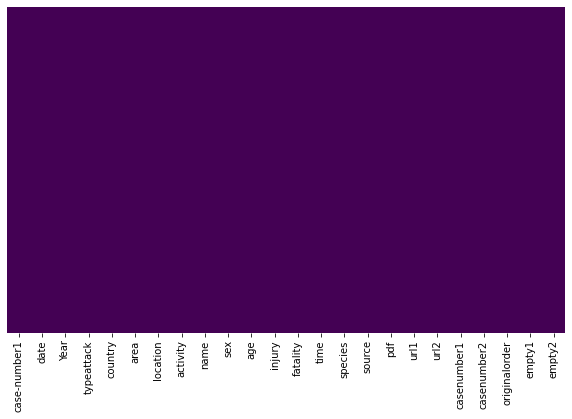

In [ ]:
#NO HAY NAN

plt.figure(figsize=(10,6))

sns.heatmap(df.isna(),
           yticklabels=False,
           cmap='viridis',
           cbar = False)

plt.show(); 

In [ ]:
# muestra no nulls

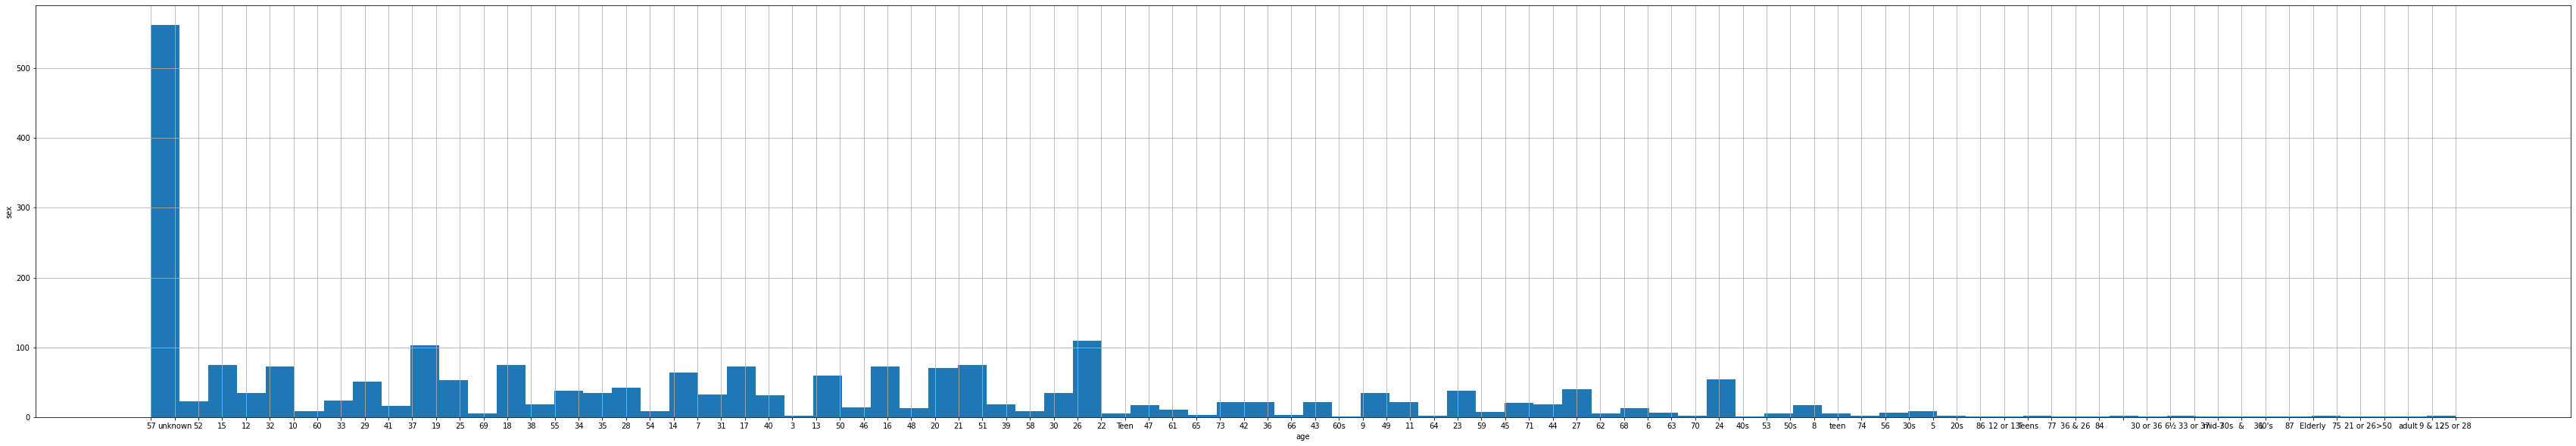

In [ ]:


# En age tengo muchos unknown que no he podido resolver

plt.figure(figsize=(60,10))

df.age.hist(bins=80)

plt.xlabel('age')
plt.ylabel('sex');

KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"

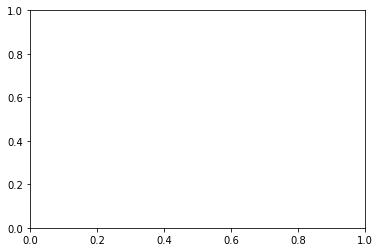

In [ ]:
df.boxplot(column=['age']) #al haber tanta porqueria dentro de la columna no furula

<AxesSubplot:>

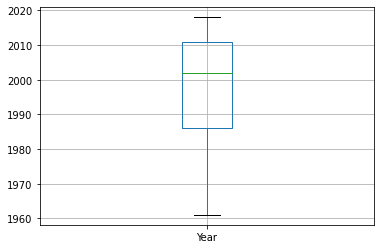

In [ ]:
df.boxplot(column=['Year'])

#si lo hacemos con year, parece que no hay outliers, y se encuentra en los años con mejor representación 2000 hacia arriba.
# 

In [ ]:
df.neighbourhood_group.value_counts().plot.bar();

AttributeError: 'DataFrame' object has no attribute 'neighbourhood_group'

In [ ]:
#voy a probar de cambiar Age  a integer y ver si sale al menos el percentil

In [ ]:
df["age"] = df["age"].apply(np.int64) # nada ya lo probe antes y no habia manera.

ValueError: invalid literal for int() with base 10: 'unknown'

In [485]:
df.describe().T.head() 

,count,mean,std,min,25%,50%,75%,max
Year,2357.0,1997.201527,16.261881,1961.0,1986.0,2002.0,2011.0,2018.0
originalorder,2357.0,4419.979211,1098.713478,2370.0,3490.0,4422.0,5382.0,6303.0


In [ ]:
df2 = pd.DataFrame((10, 4), columns=["Year", "age"])

df2.plot.bar();

ValueError: Shape of passed values is (2, 1), indices imply (2, 2)

In [ ]:
series = index=["age", "typeattacks"], name="series"

df.plot.pie(subplots=True, figsize=(8, 4));

SyntaxError: cannot assign to literal (1107642961.py, line 1)